<a href="https://colab.research.google.com/github/HaleemaAsad0/ALFA-SOLUTIONS/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# load DF from csv to pandas
iris_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IRIS.csv', encoding='latin-1')

In [ ]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_dataset.shape


(150, 5)

In [ ]:
iris_dataset.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**analysis of data**


In [ ]:
iris_dataset['species'] = pd.factorize(iris_dataset['species'])[0]
iris_dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Visualization**

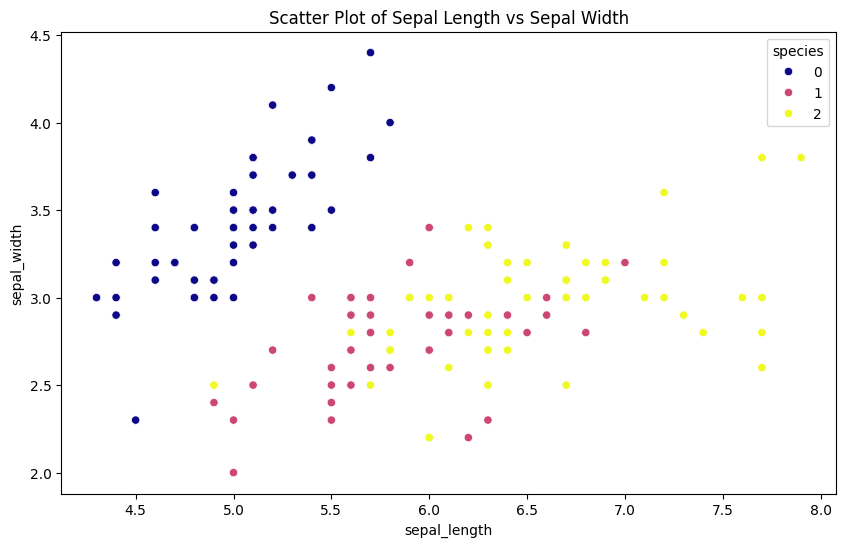

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_dataset, x='sepal_length', y='sepal_width', hue='species', palette='plasma')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

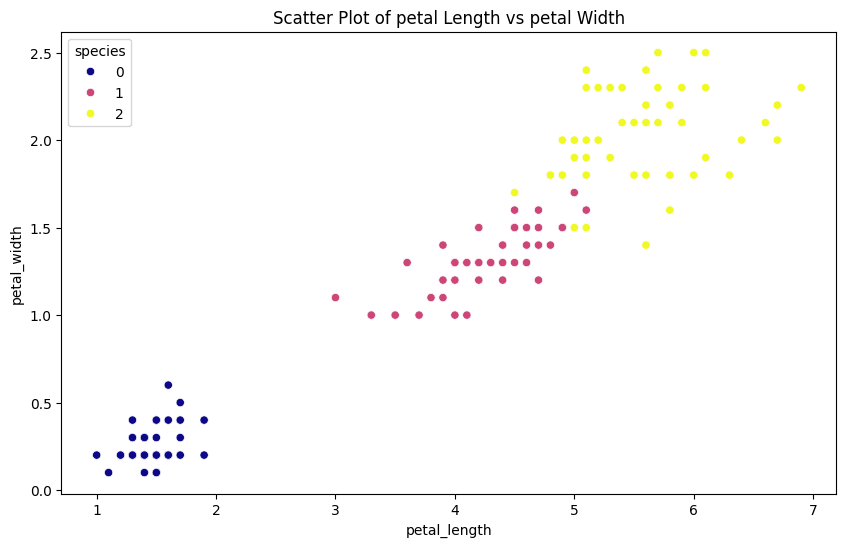

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_dataset, x='petal_length', y='petal_width', hue='species', palette='plasma')
plt.title('Scatter Plot of petal Length vs petal Width')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

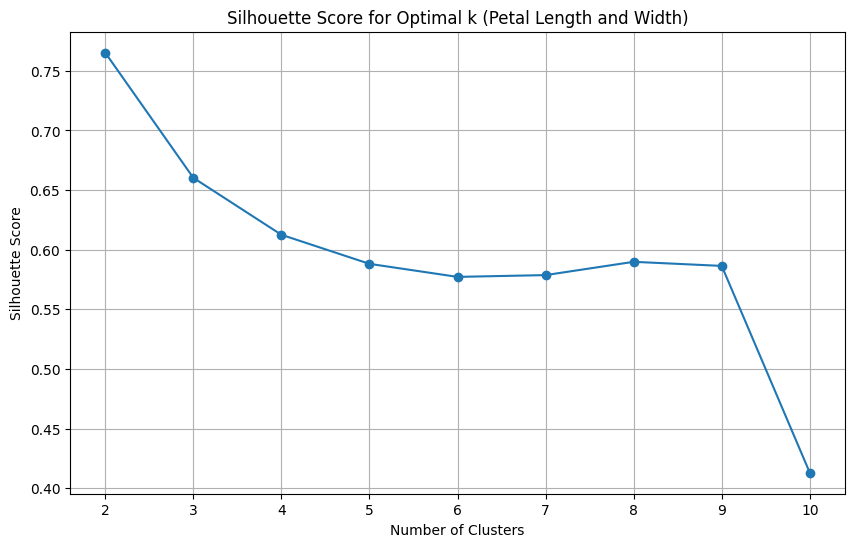

In [ ]:
from sklearn.metrics import silhouette_score

# you want to cluster based on petal_length and petal_width
X = iris_dataset[['petal_length', 'petal_width']]

silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k (Petal Length and Width)')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**K-Mean Algorithm**

In [ ]:
X = iris_dataset[['petal_length', 'petal_width']]


In [ ]:
# Choose the number of clusters (k) based on silhouette score analysis
k = 3

# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=0)
iris_dataset['cluster'] = kmeans.fit_predict(X)
iris_dataset.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


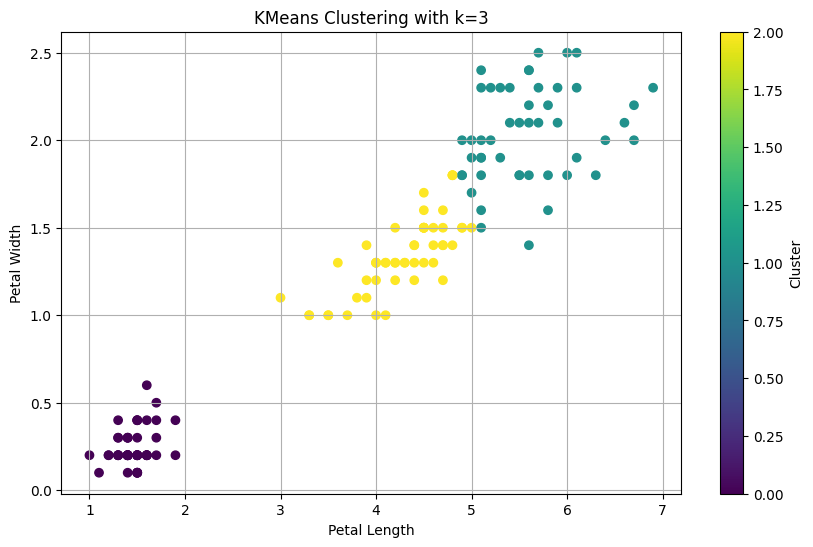

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(iris_dataset['petal_length'], iris_dataset['petal_width'], c=iris_dataset['cluster'], cmap='viridis', marker='o')
plt.title(f'KMeans Clustering with k={k}')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

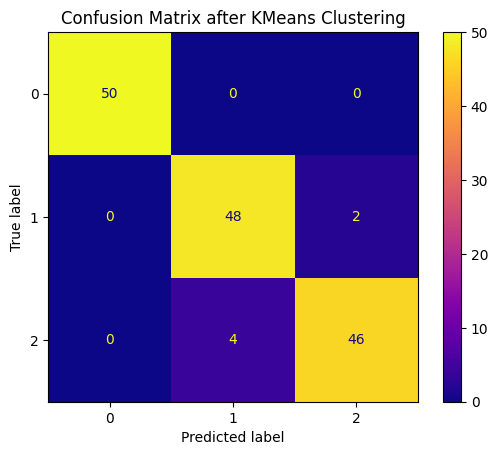

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Assuming 'iris_dataset' has the true labels in the 'species' column and the predicted clusters in the 'cluster' column
true_labels = iris_dataset['species']
predicted_clusters = iris_dataset['cluster']

# Mapping clusters to true labels
cluster_labels = pd.DataFrame({'true': true_labels, 'cluster': predicted_clusters})
cluster_mapping = cluster_labels.groupby('cluster')['true'].agg(lambda x: x.value_counts().index[0]).to_dict()

# Map predicted clusters to true labels
mapped_labels = predicted_clusters.map(cluster_mapping)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, mapped_labels, labels=np.unique(true_labels))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap='plasma', values_format='d')
plt.title('Confusion Matrix after KMeans Clustering')
plt.show()
